# Metadata

```yaml
Course:    DS 5001
Module:    13 Lab
Topic:     Visualize Wine Lexicons
Author:    R.C. Alvarado
Date:      17 April 2023
```

# Set Up

## Config

In [1]:
data_in = "../data/winereviews"

## Import

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px

## Add Lexicons to VOCAB

In [3]:
salex_nb = pd.read_csv(f'{data_in}/winereviews-NB_SALEX.csv').set_index('term_str')
salex_pt = pd.read_csv(f'{data_in}/winereviews-PERCEPTRON_SALEX.csv').set_index('term_str')
salex_mi = pd.read_csv(f'{data_in}/winereviews-MI_SALEX.csv').set_index('term_str')
salex_skmnb = pd.read_csv(f'{data_in}/winereviews-SKMNB_SALEX.csv').set_index('term_str')[['valence','polarity']]
vocab = pd.read_csv(f'{data_in}/winereviews-VOCAB.csv').set_index('term_str')

In [4]:
salex_skmnb

valence  polarity
term_str                        
aaron         7.525197       1.0
abbey         7.525197       1.0
abbott        7.525197       1.0
abbreviated  -8.942042      -1.0
ability      10.690855       1.0
...                ...       ...
zippy         0.138933       1.0
zone          0.866985       1.0
zweigelt     -2.026038      -1.0
émilion       0.284418       1.0
über         -0.708423      -1.0

[7254 rows x 2 columns]

In [5]:
# salex_nb = salex_nb.drop('n', axis=1)
# salex_nb.columns = ['nb_polarity','nb_valence','emi']
salex_nb.columns = ['nb_valence','nb_polarity']
salex_skmnb.columns = ['skmnb_valence','skmnb_polarity']
salex_pt.columns = ['perceptron_weight']
salex_mi.columns = [f"mi_{col}" for col in salex_mi.columns.tolist()]

In [6]:
VOCAB = vocab.merge(salex_nb, on='term_str')\
    .merge(salex_pt, on='term_str')\
    .merge(salex_mi, on='term_str')\
    .merge(salex_skmnb, on='term_str')

In [7]:
VOCAB

n         f      stem     sw    go  nb_valence  nb_polarity  \
term_str                                                                    
aaron         4  0.000005     aaron  False  True    4.639753          1.0   
abbott        3  0.000004    abbott  False  True    4.236397          1.0   
abbreviated   3  0.000004   abbrevi  False  True   -5.671996         -1.0   
ability      32  0.000042      abil  False  True    4.056389          1.0   
able         12  0.000016       abl  False  True    2.617185          1.0   
...          ..       ...       ...    ...   ...         ...          ...   
zippy        30  0.000039     zippi  False  True    0.065214          1.0   
zone          4  0.000005      zone  False  True    0.776965          1.0   
zweigelt      5  0.000007  zweigelt  False  True   -0.155920         -1.0   
émilion       4  0.000005   émilion  False  True   -0.717799         -1.0   
über          7  0.000009      über  False  True   -1.997907         -1.0   

             perceptron_weight      mi_N      mi_P  mi_valence  mi_polarity  \
term_str                                                                      
aaron                      0.0  0.000001  0.000343    0.000342          1.0   
abbott                     0.0  0.000001  0.000217    0.000215          1.0   
abbreviated                0.0  0.000220  0.000001   -0.000218         -1.0   
ability                    6.0  0.000001  0.001504    0.001502          1.0   
able                      -1.0  0.000082  0.000405    0.000323          1.0   
...                        ...       ...       ...         ...          ...   
zippy                      4.0  0.000765  0.001191    0.000426          1.0   
zone                       1.0  0.000001  0.000217    0.000215          1.0   
zweigelt                   2.0  0.000348  0.000150   -0.000198         -1.0   
émilion                   -2.0  0.000153  0.000081   -0.000072         -1.0   
über                       2.0  0.000285  0.000217   -0.000068         -1.0   

             skmnb_valence  skmnb_polarity  
term_str                                    
aaron             7.525197             1.0  
abbott            7.525197             1.0  
abbreviated      -8.942042            -1.0  
ability          10.690855             1.0  
able              1.985931             1.0  
...                    ...             ...  
zippy             0.138933             1.0  
zone              0.866985             1.0  
zweigelt         -2.026038            -1.0  
émilion           0.284418             1.0  
über             -0.708423            -1.0  

[6674 rows x 14 columns]

# Visualize Comparisons

In [17]:
def vis_compare(a, b):
    return px.scatter(VOCAB.reset_index(), a, b, size=np.log(VOCAB.n), height=800, hover_name='term_str')

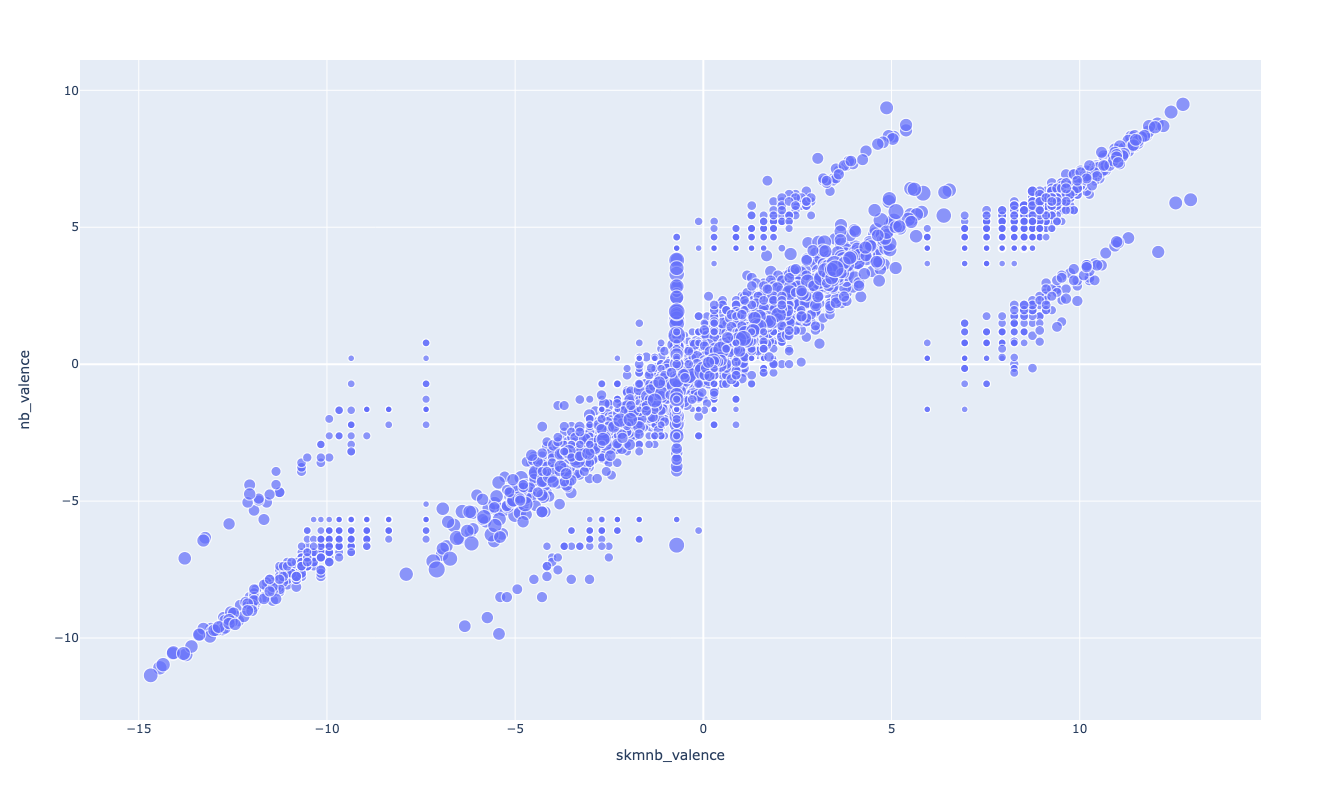

In [18]:
vis_compare('skmnb_valence', 'nb_valence')

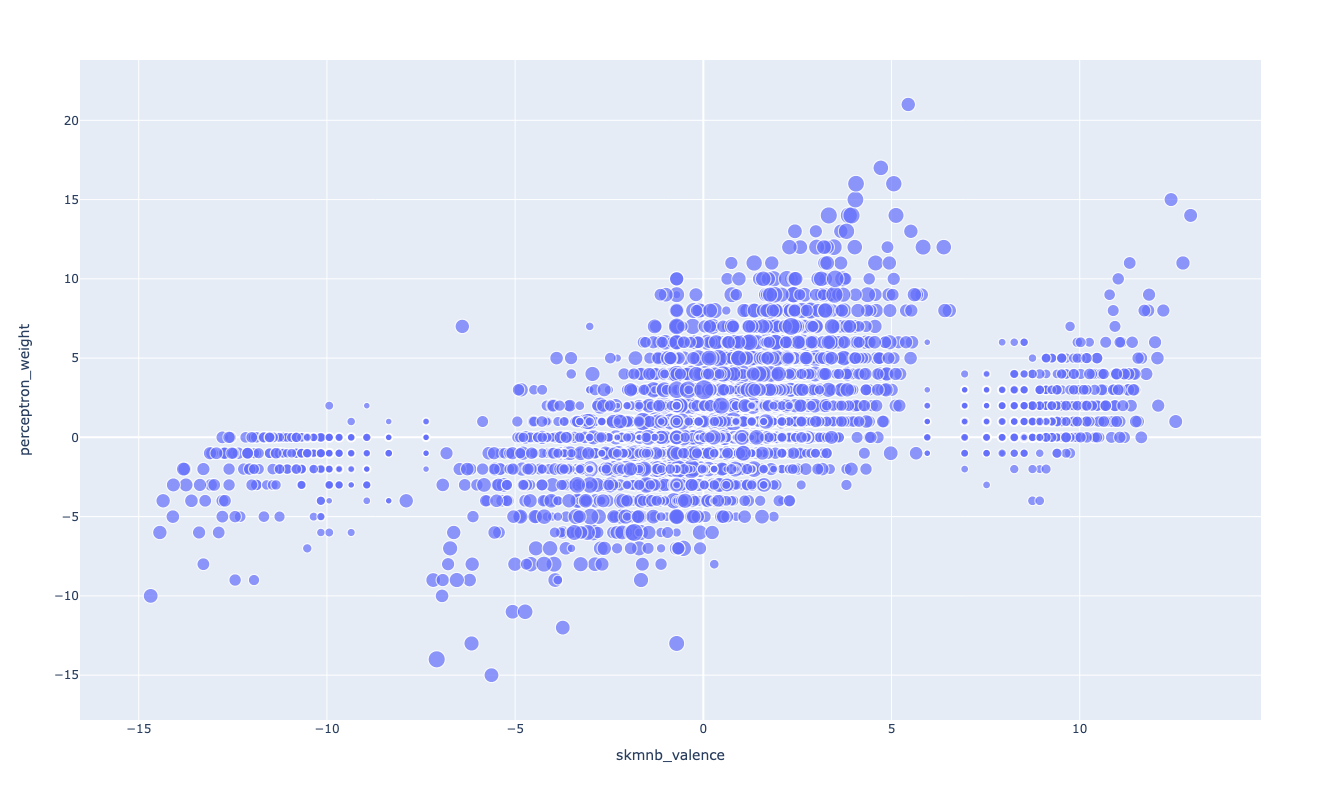

In [10]:
vis_compare('skmnb_valence', 'perceptron_weight')

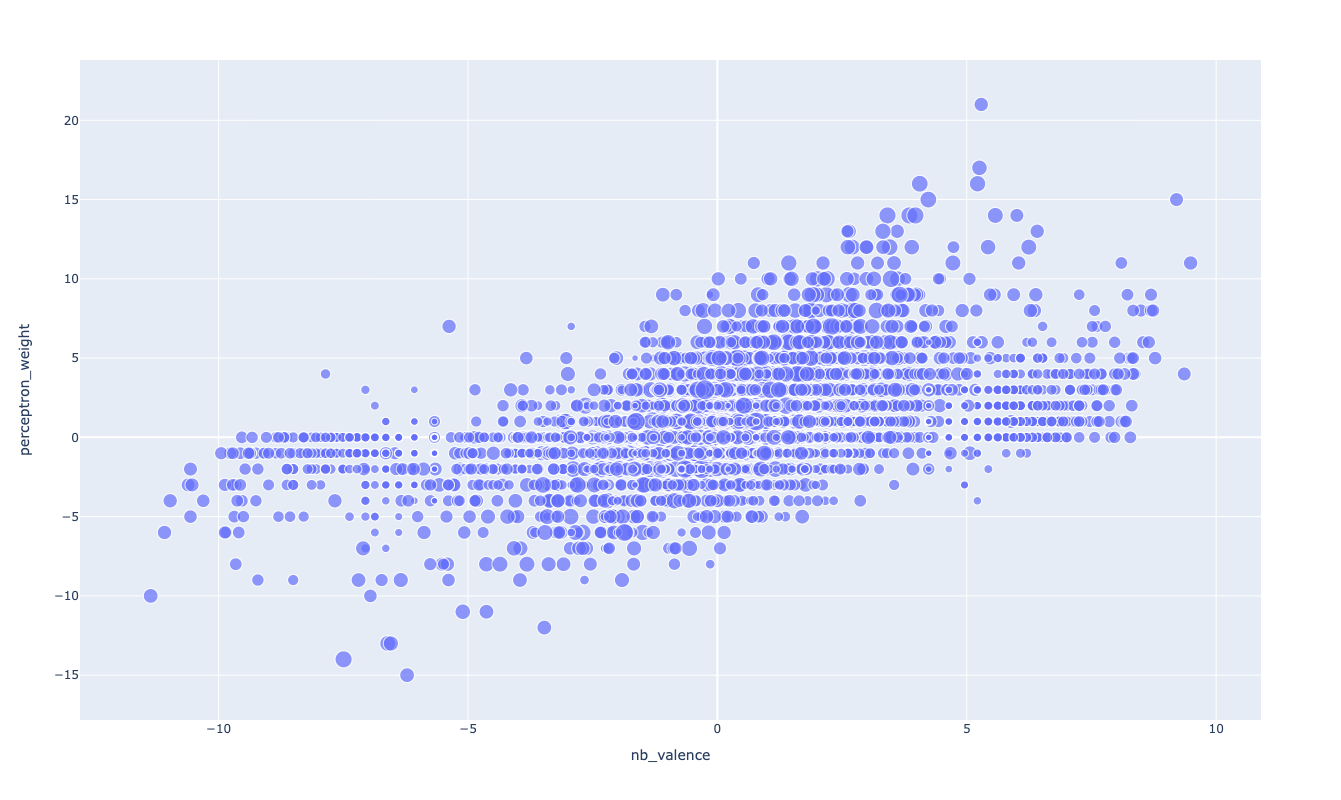

In [11]:
vis_compare('nb_valence', 'perceptron_weight')

# Scatter plots of term frequency

In [12]:
def text(x):
    global VOCAB
    fig = px.scatter(VOCAB, x, 'n', text=VOCAB.index, height=800, width=1000)
    fig.update_traces(mode="text")
    fig.show()

## Naive Bayes

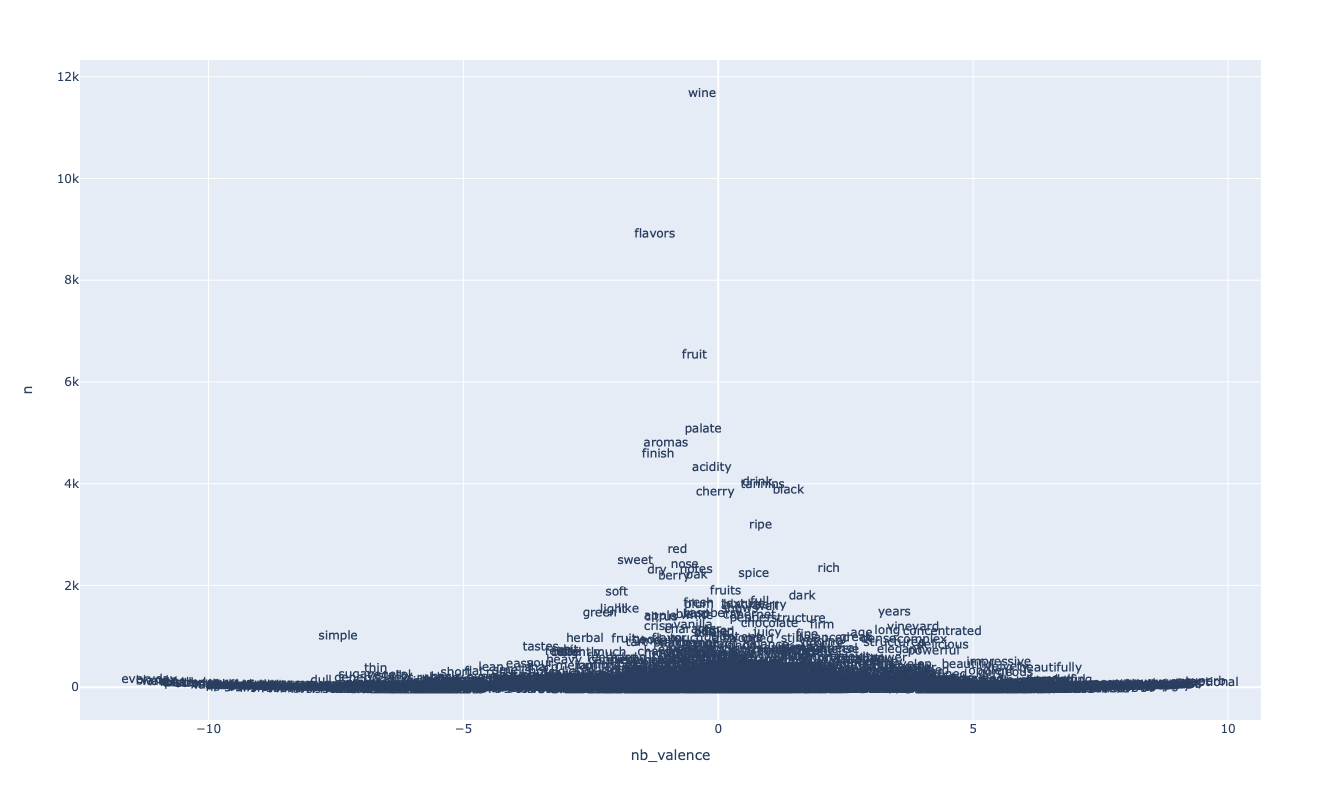

In [13]:
text('nb_valence')

## SK Naive Bayes

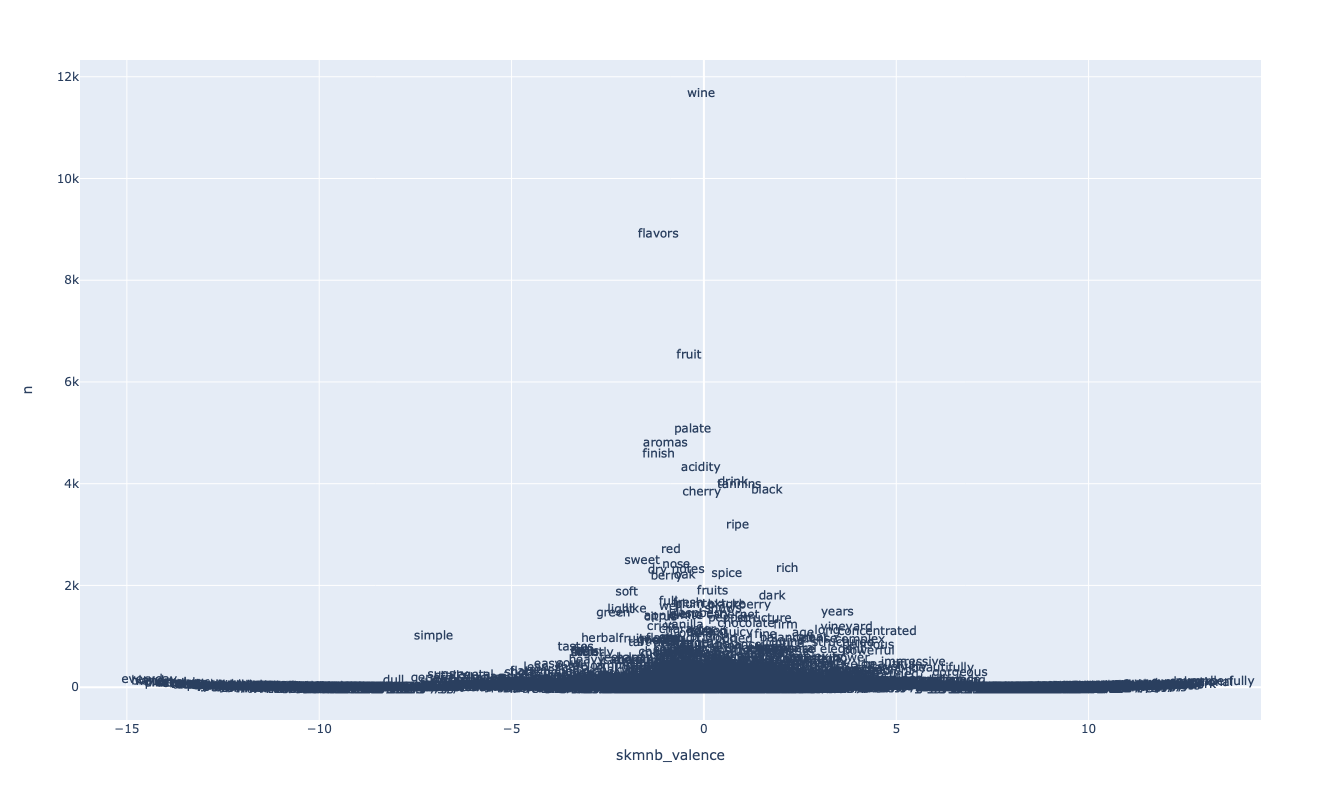

In [14]:
text('skmnb_valence')

## Perceptron

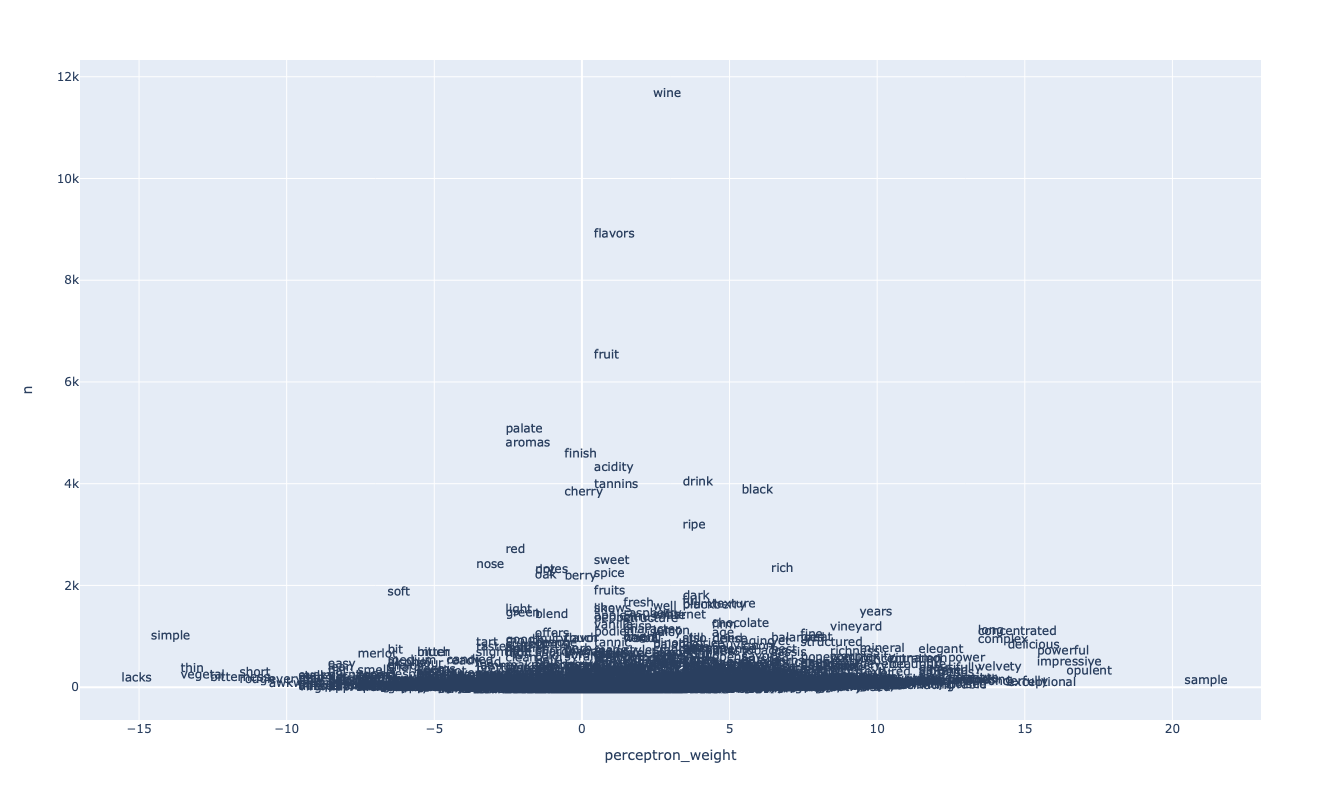

In [15]:
text('perceptron_weight')

## EMI

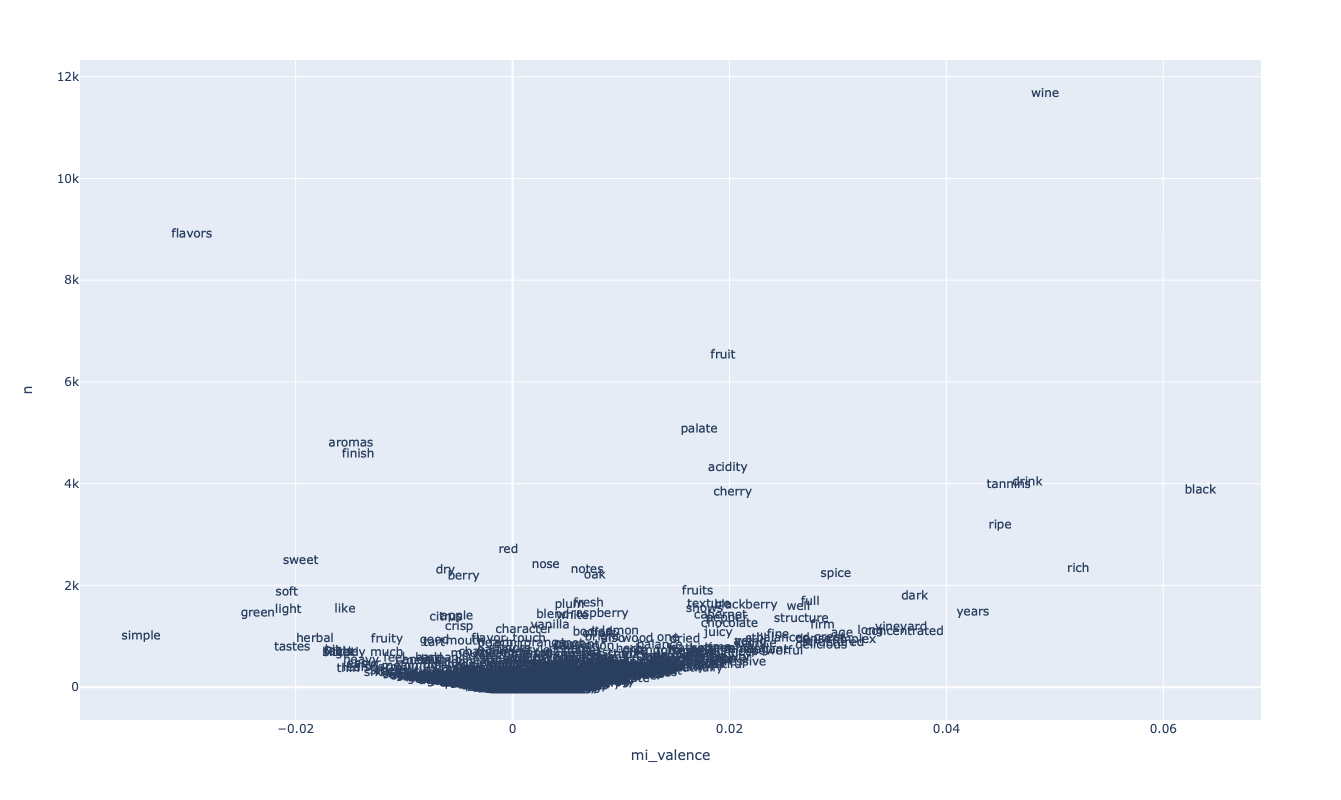

In [16]:
text('mi_valence')